# Data Overview

In [1]:
# Data analysis standard library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Memuat dataframe csv
dataframe = pd.read_csv('car-sales-extended.csv')

In [3]:
# Cek dataframe jika terdapat data kosong
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [4]:
# Menampilkan 5 baris pertama dataframe
dataframe.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


# Encoding Data

In [5]:
# Data : Semua kolom kecuali kolom price
# Label : Hanya kolom price
data = dataframe.drop('Price',axis=1)
label = dataframe['Price']

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [7]:
# List yang berisi nama kolom dengan data categori
categorical_features = ['Make','Colour']

# Encoding data untuk merubah data menjadi numerik (angka)
encoder = OneHotEncoder()
transformer = ColumnTransformer([('encoder',encoder,categorical_features)],remainder='passthrough')
transformed_data = transformer.fit_transform(data)

In [8]:
encoded_data = pd.get_dummies(data)

In [9]:
encoded_data.head()

,Odometer (KM),Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,35431,4,0,1,0,0,0,0,0,0,1
1,192714,5,1,0,0,0,0,1,0,0,0
2,84714,4,0,1,0,0,0,0,0,0,1
3,154365,4,0,0,0,1,0,0,0,0,1
4,181577,3,0,0,1,0,0,1,0,0,0


# Normalize Data / Data Generalization

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
# Melakukan normalisasi data agar data berupa angka 0 sampai 1
scaled_data = pd.DataFrame(scaler.fit_transform(encoded_data))

In [13]:
# Menampikan 5 baris pertama dataframe yang sudah diproses
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.105472,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.761606,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.311065,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.601626,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.715146,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# Split Data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Memisahkan data menjadi 4
x_train,x_test,y_train,y_test = train_test_split(scaled_data,label,test_size=0.2)

# Machine Learning Model

In [16]:
from sklearn.svm import SVR

In [17]:
# Menggunakan SVR sebagai machine learning estimator (model)
model = SVR(gamma='scale',verbose=True)

In [18]:
# Melatih model
model.fit(x_train,y_train)

[LibSVM]

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

In [19]:
# Membuat prediksi
prediction = model.predict(x_test)

In [20]:
# Memvisualisasikan hasil prediksi model
def visualizeModel(y_true,y_pred,title=None):
    plt.figure(figsize=(20,5))
    plt.title(title)
    plt.plot(range(len(y_pred)),prediction,label='Prediction',alpha=0.5)
    plt.plot(range(len(y_test)),y_test,label='Actual',alpha=0.5)
    plt.legend()
    plt.show()

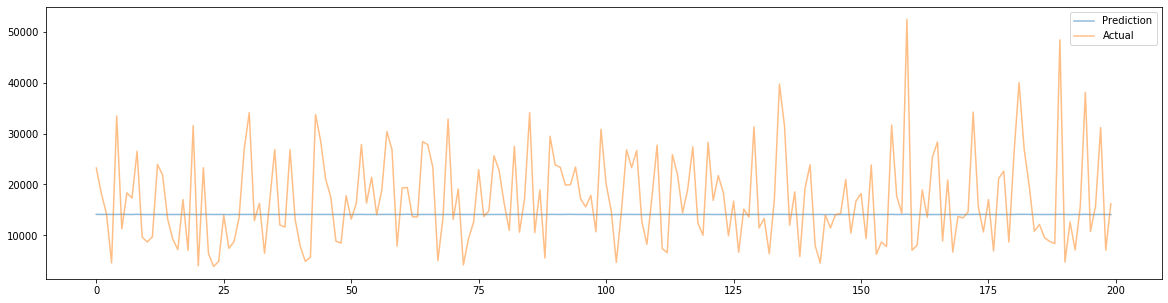

In [21]:
visualizeModel(y_test,prediction)

# Evaluating Model
Evauation Metrics for Regresion are :
* Mean Absolute Error (MAE)
* Root Mean Squared Error (RMSE)
* Mean Absolute Percentage Error (MAPE)
* R-Squared Score

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [23]:
# Melakukan evaluasi model dengan error metric
def evaluateModel(y_true,y_pred):
    mae = mean_absolute_error(y_true,y_pred)
    rmse = mean_squared_error(y_true,y_pred)
    r = r2_score(y_true,y_pred)

    score = {'Mean Absolute Error (MAE)' : mae,'Root Mean Squared Error (RMSE)':rmse,'R-Squared Score (r2)':r}
    return score

In [24]:
evaluateModel(y_test,prediction)

{'Mean Absolute Error (MAE)': 7084.460775939146,
 'Root Mean Squared Error (RMSE)': 87895261.95754658,
 'R-Squared Score (r2)': -0.10989126175605879}

# Improve Model

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
# Mencoba berbagai Hyperparameter model
params = {'kernel': ['rbf'],
          'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
          'C': [1, 10, 100, 1000, 10000]}

In [27]:
best_model = GridSearchCV(model,params,cv=5,refit=True,n_jobs=-1)

In [28]:
best_model.fit(x_train,y_train)

[LibSVM]

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=True),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.6,
                                   0.9],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
# Mendapatkan model dengan parameter terbaik
best_model.best_estimator_

SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

In [30]:
# Melakukan prediksi
prediction = best_model.predict(x_test)

In [31]:
# Melakukan evaluasi
evaluateModel(y_test,prediction)

{'Mean Absolute Error (MAE)': 5962.56339632963,
 'Root Mean Squared Error (RMSE)': 52093904.257222965,
 'R-Squared Score (r2)': 0.34218787408842466}

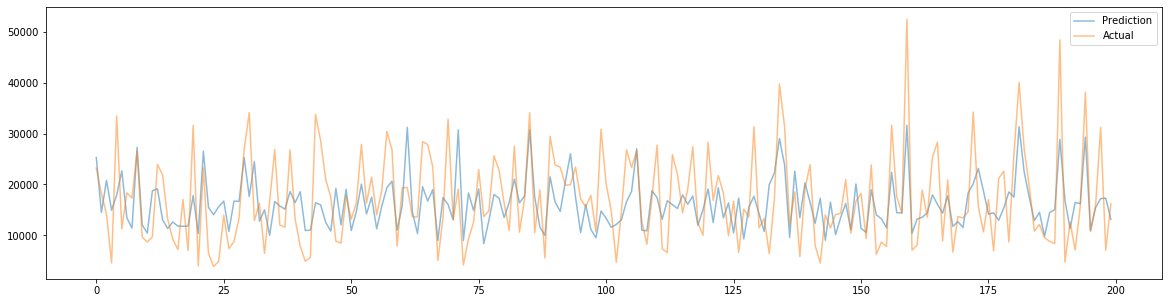

In [32]:
# Visualisasi prediksi model
visualizeModel(y_test,prediction)

# Save Model

In [33]:
import pickle

In [34]:
# Menyimpan model
with open('CarSales-SVRModel.pkl','wb') as file:
    pickle.dump(best_model,file)